In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm, vhmm
import joblib

# Import data

Chargement des corrdonnées du museau 

In [2]:
X_head = pd.pandas.read_csv("../data/head_coords.csv",  header=None)
len(X_head[0])

1375

Text(0.5, 0.98, 'Cow Head Coordinates')

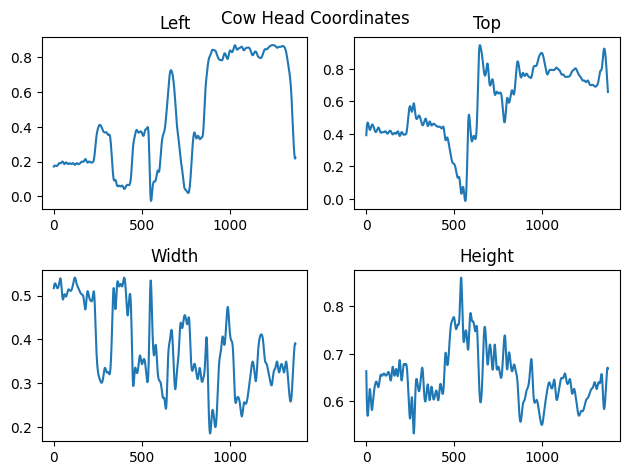

In [3]:
plt.subplot(2,2,1)
plt.plot(range(0,len(X_head)) , X_head[0])
plt.title("Left")
plt.subplot(2,2,2)
plt.plot(range(0,len(X_head)) ,X_head[1])
plt.title("Top")
plt.subplot(2,2,3)
plt.plot(range(0,len(X_head)) ,X_head[2])
plt.title("Width")
plt.subplot(2,2,4)
plt.plot(range(0,len(X_head)) ,X_head[3])
plt.title("Height")
plt.tight_layout()
plt.suptitle('Cow Head Coordinates')

# Train model

In [4]:
scores_EM = scores_VI = list()
models_EM = models_VI = list()

for n_components in range(2, 5): # test 2 to 5 n components
    for idx in range(10):  # ten different random starting states
        # defining hidden Markov model using EM
        model_EM = hmm.GaussianHMM(n_components=n_components, random_state=idx,covariance_type = "full", n_iter=50)
        # defining hidden Markov model using VI
        #model_VI = vhmm.VariationalGaussianHMM(n_components=n_components, random_state=idx,covariance_type = "full", n_iter=50)

        model_EM.fit(X_head)
        #model_VI.fit(X_head)

        models_EM.append(model_EM)
        #models_VI.append(model_VI)

        scores_EM.append(model_EM.score(X_head))
        #scores_VI.append(model_VI.score(X_head))

        """ print(f'Converged [EM]: {model_EM.monitor_.converged}\t\t'f'Score: {scores_EM[-1]}')
        print(f'Converged [VI]: {model_VI.monitor_.converged}\t\t'f'Score: {scores_VI[-1]}') """

# get the best model
model_EM = models_EM[np.argmax(scores_EM)]
#model_VI = models_VI[np.argmax(scores_VI)]

print(f'The best EM model had a score of {max(scores_EM)} and 'f'{model_EM.n_components} components')
#print(f'The best VI model had a score of {max(scores_VI)} and 'f'{model_VI.n_components} components')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
Z_EM = model_EM.predict(X_head)
#Z_VI = model_VI.predict(X_head)

joblib.dump(model_EM, 'models/EM/hmm_model_head.pkl')
#joblib.dump(model_VI, 'models/Vi/hmm_model_head.pkl')

Model is not converging.  Current: 6121.7432634061215 is not greater than 6121.743620882379. Delta is -0.0003574762577045476
Model is not converging.  Current: 6292.998310151114 is not greater than 6293.0164160026725. Delta is -0.018105851558175345
Model is not converging.  Current: 8796.966405637699 is not greater than 8796.980995337304. Delta is -0.014589699605494388
Model is not converging.  Current: 8446.323893978613 is not greater than 8446.324532227836. Delta is -0.0006382492229022318
Model is not converging.  Current: 9320.112211245058 is not greater than 9320.115124823182. Delta is -0.002913578124207561


The best EM model had a score of 9333.739826551599 and 4 components


['models/EM/hmm_model_head.pkl']

In [14]:
print(f"Moyennes EM:\n{model_EM.means_}")

# print(f"Moyennes VI:\n{model_VI.means_}")
print(f"Covariance :\n{model_EM.covars_}")
print(f"Transmission matrice EM:\n{model_EM.transmat_}")
print(f"Probabilite initiale EM:\n{model_EM.startprob_}")
# print(f"Convergence :\n{model.monitor_}")

Moyennes EM:
[[0.8191884  0.77636528 0.32767281 0.6210182 ]
 [0.15361121 0.42751953 0.50825376 0.63746404]
 [0.28617074 0.21796552 0.37591445 0.73538072]
 [0.30583899 0.5999289  0.33956132 0.67290847]]
Covariance :
[[[ 2.64561965e-03 -1.09321132e-03 -1.19984357e-03 -5.99796298e-04]
  [-1.09321132e-03  2.38331835e-03  1.25387658e-03 -4.42059070e-04]
  [-1.19984357e-03  1.25387658e-03  4.18884672e-03 -1.96762321e-04]
  [-5.99796298e-04 -4.42059070e-04 -1.96762321e-04  1.40889724e-03]]

 [[ 3.46934254e-03 -9.91421126e-04 -3.90258797e-05  8.68492131e-04]
  [-9.91421126e-04  6.31858185e-04  1.33622066e-04 -5.47963546e-04]
  [-3.90258797e-05  1.33622066e-04  4.19930460e-04 -1.36492878e-04]
  [ 8.68492131e-04 -5.47963546e-04 -1.36492878e-04  7.30088572e-04]]

 [[ 1.73540553e-02  7.02662159e-03 -6.63087759e-03  1.49354047e-03]
  [ 7.02662159e-03  2.49219996e-02 -4.61481613e-04 -8.21211349e-03]
  [-6.63087759e-03 -4.61481613e-04  3.67063310e-03 -1.08891088e-03]
  [ 1.49354047e-03 -8.21211349e-0

In [ ]:
# calculate the mesans for every state using the four observations/ coordinates
# etat_moyen = model_EM

last coordinates:

This the Y :
0      0.663207
1      0.637912
2      0.617213
3      0.600754
4      0.588182
         ...   
437    0.618385
438    0.621255
439    0.625262
440    0.630514
441    0.637043
Name: 3, Length: 338, dtype: float64
last coordinates:

This the Y :
233    0.660119
234    0.654564
235    0.648432
236    0.641800
237    0.634747
         ...   
565    0.748732
566    0.749167
567    0.748849
568    0.747700
569    0.745644
Name: 3, Length: 133, dtype: float64
last coordinates:

This the Y :
244     0.581688
245     0.575587
246     0.570518
247     0.566708
248     0.564388
          ...   
1370    0.667878
1371    0.669977
1372    0.670888
1373    0.670472
1374    0.668593
Name: 3, Length: 390, dtype: float64
last coordinates:

This the Y :
652     0.600207
653     0.602948
654     0.606695
655     0.611428
656     0.617128
          ...   
1338    0.657199
1339    0.656311
1340    0.653866
1341    0.649703
1342    0.644073
Name: 3, Length: 514, dtype: float6

Text(0.5, 0.98, 'Cows HEAD Coordinates, EM gaussian')

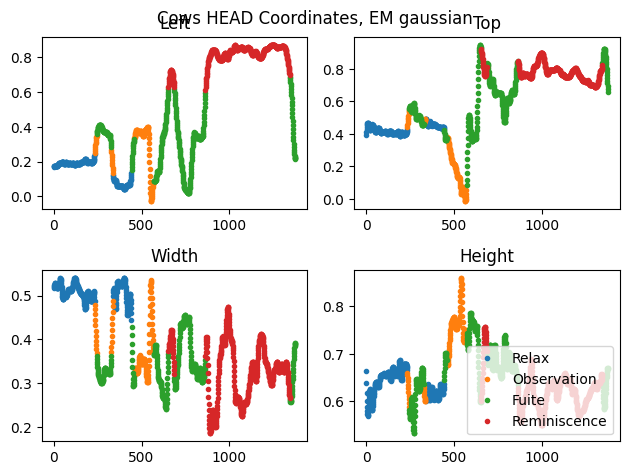

In [13]:
states_EM = pd.unique(Z_EM)
#print(type(Z_EM))
state_names = ['Relax', 'Observation', 'Fuite', 'Reminiscence']

plt.subplot(2,2,1)
for i in states_EM:
    x = np.linspace(1,len(X_head[0]),len(X_head[0]))[(Z_EM == i)]
    y = X_head[0][(Z_EM == i)]
    plt.plot(x, y, '.')
    plt.title("Left")
    # plt.xticks(range(model_EM.n_components), state_names)
    
plt.subplot(2,2,2)
for i in states_EM:
    x = np.linspace(1,len(X_head[1]),len(X_head[1]))[(Z_EM == i)]
    y = X_head[1][(Z_EM == i)]
    plt.plot(x, y, '.')
    plt.title("Top")

plt.subplot(2,2,3)
for i in states_EM:
    x = np.linspace(1,len(X_head[2]),len(X_head[2]))[(Z_EM == i)]
    y = X_head[2][(Z_EM == i)]
    plt.plot(x, y, '.')
    plt.title("Width")

plt.subplot(2,2,4)
for i in states_EM:
    x = np.linspace(1,len(X_head[3]),len(X_head[3]))[(Z_EM == i)]
    y = X_head[3][(Z_EM == i)]
    print("last coordinates:\n")
    #print(f"This is the X :\n{x}")
    print(f"This the Y :\n{y}")
    plt.plot(x, y, '.')
    plt.title("Height")

plt.tight_layout()
plt.legend(labels=state_names, loc="lower right", ncol=1)
plt.suptitle('Cows HEAD Coordinates, EM gaussian')

In [7]:
df=pd.DataFrame({'states':Z_EM})
# make the same thing for the others 
df.to_csv("../INF889E Project/Trained data/EM/head_coords_hmmstates.csv")